In [2]:
library(phyloseq)
library(ape)
library(dplyr)
library(ggplot2)
library(phytools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: maps



In [5]:
load("../02-diversity_analyses/.RData") 
ps.dat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

In [11]:
# load in replacement mapping file
map <- read.table("strep_abund_for_capplot.txt", sep="\t", header=T, row.names=1)
sample_data(ps.dat) <- map
head(sample_data(ps.dat))

,study_group,tooth_health,low_hi,low_hi_group,Abundance
,<chr>,<chr>,<chr>,<chr>,<dbl>
DM00001V1PQ,CLWH,CAE-PE,CAE-PE,CAE-PE,NA
DM00005V1PQ46-2,HUU,CF-PF,CF-PF,CF-PF,NA
DM00006V1PQ1,CLWH,CF-PF,CF-PF,CF-PF,NA
DM00007V1PQ1,HEU,CF-PF,CF-PF,CF-PF,NA
DM00008V1PQ16-2,CLWH,CF-PF,CF-PF,CF-PF,NA
DM00008V1PQ26-1,CLWH,CF-PF,CF-PF,CF-PF,NA


pdf 
  2

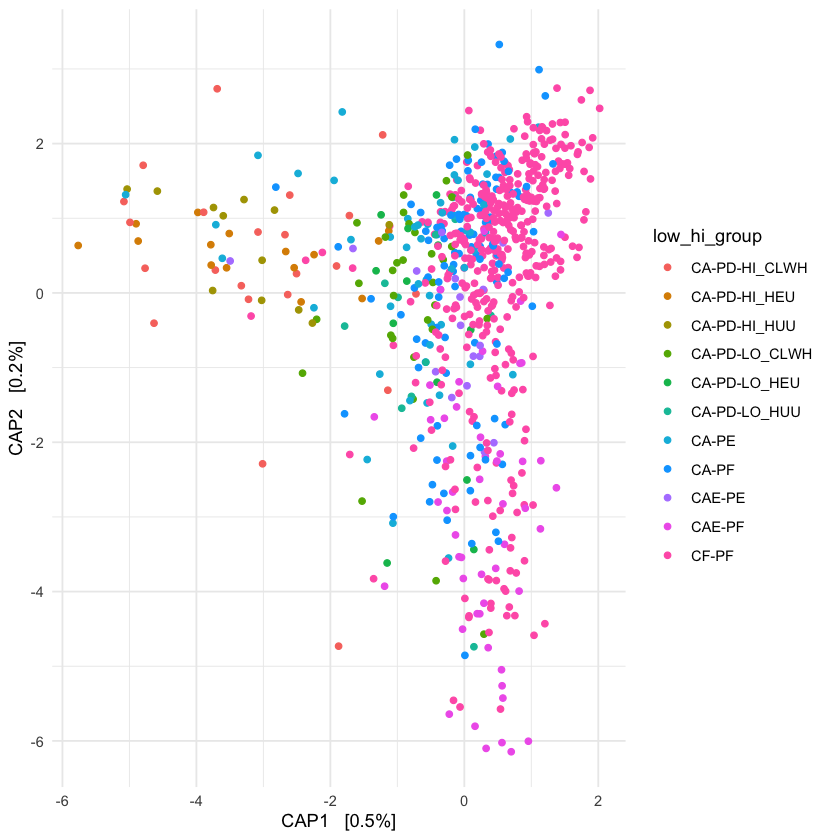

In [13]:
ordcap <- ordinate(ps.dat, "CAP", "bray", ~tooth_health)
plot_ordination(ps.dat, ordcap, "samples", color="low_hi_group") + theme_minimal()
pdf("img/capscale_plt.strep_lo_hi.pdf")
plot_ordination(ps.dat, ordcap, "samples", color="low_hi_group") + theme_minimal()
dev.off()